# Tayler Stegman
## Week15 11/28/2023
### Python - Pandas DataFrame - Mapping, Applying, Grouping

In [1]:
import numpy as np

from pandas import Series, DataFrame
import pandas as pd

In [2]:
#map() maps every entry in a new column
df = DataFrame({'city':['Alma', 'Brian Head', 'Fox Park', 'Lake Mary'],
               'altitude':[10355, 9800, 9062, 8966]})
df

city  altitude
0        Alma     10355
1  Brian Head      9800
2    Fox Park      9062
3   Lake Mary      8966

In [3]:
st = {'Alma':'Colorado', 'Brian Head':'Utah', 'Fox Park': 'Wyoming', 'Lake Mary':'California'}
st

{'Alma': 'Colorado',
 'Brian Head': 'Utah',
 'Fox Park': 'Wyoming',
 'Lake Mary': 'California'}

In [5]:
#Mapping states to cities and inserting a new column
df['state'] = df['city'].map(st)
df

city  altitude       state
0        Alma     10355    Colorado
1  Brian Head      9800        Utah
2    Fox Park      9062     Wyoming
3   Lake Mary      8966  California

In [6]:
#apply (in this purpose changing altitude to meters)
df1 = df.copy()
df1

city  altitude       state
0        Alma     10355    Colorado
1  Brian Head      9800        Utah
2    Fox Park      9062     Wyoming
3   Lake Mary      8966  California

In [7]:
def meter(x):
    return x / 3.2808

In [10]:
#Use meter to change the altitude column to meters
df['altitude'] = df['altitude'].apply(meter)

In [11]:
df

city    altitude       state
0        Alma  962.034376    Colorado
1  Brian Head  910.471935        Utah
2    Fox Park  841.907824     Wyoming
3   Lake Mary  832.988915  California

In [12]:
def feet(x):
    return x * 3.2808

In [13]:
df['altitude'] = df['altitude'].apply(feet)

In [14]:
df

city     altitude       state
0        Alma  3156.242380    Colorado
1  Brian Head  2987.076323        Utah
2    Fox Park  2762.131188     Wyoming
3   Lake Mary  2732.870032  California

In [18]:
#Doing it with lambda (instead of making an outside function)
df1['altitude'] = df1['altitude'].apply(lambda x: x / 3.2808)
df1

city     altitude       state
0        Alma  3156.242380    Colorado
1  Brian Head  2987.076323        Utah
2    Fox Park  2762.131188     Wyoming
3   Lake Mary  2732.870032  California

In [19]:
df = DataFrame(np.random.randn(4,3), columns=list('bde'),
              index=['UT','OH','TX','OR'])
df

b         d         e
UT -1.411942  0.449177  0.344639
OH -1.217145 -0.125984  0.378910
TX -0.879833 -0.616468  0.249330
OR  1.078160 -1.587632 -2.231533

In [20]:
df1 = df.copy()
def dif(x):
    return x.max() - x.min()

In [21]:
df.apply(dif)

b    2.490102
d    2.036809
e    2.610443
dtype: float64

In [23]:
df.apply(lambda x: x.max() - x.min(), axis=1)

UT    1.861120
OH    1.596055
TX    1.129163
OR    3.309693
dtype: float64

In [24]:
df

b         d         e
UT -1.411942  0.449177  0.344639
OH -1.217145 -0.125984  0.378910
TX -0.879833 -0.616468  0.249330
OR  1.078160 -1.587632 -2.231533

In [25]:
df.apply(pd.value_counts)

b    d    e
-2.231533  NaN  NaN  1.0
-1.587632  NaN  1.0  NaN
-1.411942  1.0  NaN  NaN
-1.217145  1.0  NaN  NaN
-0.879833  1.0  NaN  NaN
-0.616468  NaN  1.0  NaN
-0.125984  NaN  1.0  NaN
 0.249330  NaN  NaN  1.0
 0.344639  NaN  NaN  1.0
 0.378910  NaN  NaN  1.0
 0.449177  NaN  1.0  NaN
 1.078160  1.0  NaN  NaN

In [26]:
df.apply(pd.value_counts).fillna(0)

b    d    e
-2.231533  0.0  0.0  1.0
-1.587632  0.0  1.0  0.0
-1.411942  1.0  0.0  0.0
-1.217145  1.0  0.0  0.0
-0.879833  1.0  0.0  0.0
-0.616468  0.0  1.0  0.0
-0.125984  0.0  1.0  0.0
 0.249330  0.0  0.0  1.0
 0.344639  0.0  0.0  1.0
 0.378910  0.0  0.0  1.0
 0.449177  0.0  1.0  0.0
 1.078160  1.0  0.0  0.0

In [27]:
df.apply(pd.value_counts).fillna(0).astype(int)

b  d  e
-2.231533  0  0  1
-1.587632  0  1  0
-1.411942  1  0  0
-1.217145  1  0  0
-0.879833  1  0  0
-0.616468  0  1  0
-0.125984  0  1  0
 0.249330  0  0  1
 0.344639  0  0  1
 0.378910  0  0  1
 0.449177  0  1  0
 1.078160  1  0  0

In [29]:
df.apply(pd.value_counts,axis=1).fillna(0).astype(int)

-2.231533  -1.587632  -1.411942  -1.217145  -0.879833  -0.616468  \
UT          0          0          1          0          0          0   
OH          0          0          0          1          0          0   
TX          0          0          0          0          1          1   
OR          1          1          0          0          0          0   

    -0.125984   0.249330   0.344639   0.378910   0.449177   1.078160  
UT          0          0          1          0          1          0  
OH          1          0          0          1          0          0  
TX          0          1          0          0          0          0  
OR          0          0          0          0          0          1

In [30]:
#groupby groups data entry and gives summary statistics
df = DataFrame({'brand': ['Toyota', 'Ford', 'GMC', 'Ford', 'Toyota', 'GMC', 'GMC'],
               'price':[40000, 25000, 30000, 35000, 50000, 35000, 32000]})
df

brand  price
0  Toyota  40000
1    Ford  25000
2     GMC  30000
3    Ford  35000
4  Toyota  50000
5     GMC  35000
6     GMC  32000

In [31]:
df.groupby('brand').sum()

price
brand        
Ford    60000
GMC     97000
Toyota  90000

In [32]:
df.groupby('brand').mean()

price
brand               
Ford    30000.000000
GMC     32333.333333
Toyota  45000.000000

In [33]:
df.groupby('brand').count()

price
brand        
Ford        2
GMC         3
Toyota      2

In [41]:
#generate series instead of data frame
df.groupby('brand')['price'].count()

brand
Ford      2
GMC       3
Toyota    2
Name: price, dtype: int64

In [38]:
s = df['price'].groupby(df['brand']).count()

In [39]:
s

brand
Ford      2
GMC       3
Toyota    2
Name: price, dtype: int64

In [40]:
type(s)

pandas.core.series.Series

In [42]:
type(df)

pandas.core.frame.DataFrame

In [43]:
s.index

Index(['Ford', 'GMC', 'Toyota'], dtype='object', name='brand')

In [44]:
df.groupby('brand')[['price']].count()

price
brand        
Ford        2
GMC         3
Toyota      2

In [47]:
df['cum_sum'] = df.groupby('brand')['price'].cumsum()
df

brand  price  cum_sum
0  Toyota  40000    40000
1    Ford  25000    25000
2     GMC  30000    30000
3    Ford  35000    60000
4  Toyota  50000    90000
5     GMC  35000    65000
6     GMC  32000    97000

In [50]:
df = DataFrame({'date': pd.date_range(start='2023-11-28', periods=8),
               'category': list('AAAABBBB'),
               'value': np.random.randint(10,30,size=8)})
df

date category  value
0 2023-11-28        A     27
1 2023-11-29        A     18
2 2023-11-30        A     19
3 2023-12-01        A     23
4 2023-12-02        B     23
5 2023-12-03        B     13
6 2023-12-04        B     20
7 2023-12-05        B     17

In [51]:
df1 = df.copy()
df['cum_sum'] = df['value'].cumsum()
df

date category  value  cum_sum
0 2023-11-28        A     27       27
1 2023-11-29        A     18       45
2 2023-11-30        A     19       64
3 2023-12-01        A     23       87
4 2023-12-02        B     23      110
5 2023-12-03        B     13      123
6 2023-12-04        B     20      143
7 2023-12-05        B     17      160

In [52]:
#only find cumsum for the same category
df['cum_sum'] = df.groupby('category')['value'].cumsum()

In [53]:
df

date category  value  cum_sum
0 2023-11-28        A     27       27
1 2023-11-29        A     18       45
2 2023-11-30        A     19       64
3 2023-12-01        A     23       87
4 2023-12-02        B     23       23
5 2023-12-03        B     13       36
6 2023-12-04        B     20       56
7 2023-12-05        B     17       73

In [54]:
df = DataFrame({'k1': ['a','a','b','b','c'],
               'k2': ['one','two','one','two','one'],
               'dataset1': np.random.randn(5),
               'dataset2': np.random.randn(5)})
df

k1   k2  dataset1  dataset2
0  a  one  0.820478 -1.603545
1  a  two -1.682449 -0.391546
2  b  one  0.271523  0.057447
3  b  two -0.373061  1.564793
4  c  one  1.701506  1.228917

In [56]:
#Tells us how many rows are under each 'a' or 'b'
df.groupby('k1').count()

k2  dataset1  dataset2
k1                        
a    2         2         2
b    2         2         2
c    1         1         1

In [57]:
df.groupby('k1').mean()

dataset1  dataset2
k1                    
a  -0.430986 -0.997546
b  -0.050769  0.811120
c   1.701506  1.228917

In [58]:
df.groupby('k2').count()

k1  dataset1  dataset2
k2                         
one   3         3         3
two   2         2         2

In [59]:
df.groupby('k2').mean()

dataset1  dataset2
k2                     
one  0.931169 -0.105727
two -1.027755  0.586623

In [60]:
df.groupby(['k1','k2']).sum()

dataset1  dataset2
k1 k2                     
a  one  0.820478 -1.603545
   two -1.682449 -0.391546
b  one  0.271523  0.057447
   two -0.373061  1.564793
c  one  1.701506  1.228917

In [64]:
#generates series
df['dataset1'].groupby(df['k1']).mean()

k1
a   -0.430986
b   -0.050769
c    1.701506
Name: dataset1, dtype: float64

In [63]:
#generates data frame
df.groupby('k1')[['dataset1']].sum()

dataset1
k1          
a  -0.861972
b  -0.101539
c   1.701506

In [65]:
df.groupby('k2')[['dataset1']].sum()

dataset1
k2           
one  2.793506
two -2.055510

In [74]:
df.groupby(['k1','k2'])[['dataset2']].mean()

dataset2
k1 k2           
a  one -1.603545
   two -0.391546
b  one  0.057447
   two  1.564793
c  one  1.228917

In [75]:
type(df.groupby(['k1','k2'])[['dataset2']].mean())

pandas.core.frame.DataFrame

In [77]:
group = df.groupby(['k1','k2'])[['dataset1']]

In [78]:
group

In [79]:
group.sum()

dataset1
k1 k2           
a  one  0.820478
   two -1.682449
b  one  0.271523
   two -0.373061
c  one  1.701506

In [80]:
group.mean()

dataset1
k1 k2           
a  one  0.820478
   two -1.682449
b  one  0.271523
   two -0.373061
c  one  1.701506

In [81]:
#Plotting Data Using Pandas
s = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2023', periods = 1000))
s

2023-01-01    0.576549
2023-01-02    0.243267
2023-01-03   -0.204662
2023-01-04   -0.827927
2023-01-05    0.484125
                ...   
2025-09-22   -0.068956
2025-09-23   -1.627193
2025-09-24   -1.971677
2025-09-25   -0.732287
2025-09-26   -0.140624
Freq: D, Length: 1000, dtype: float64

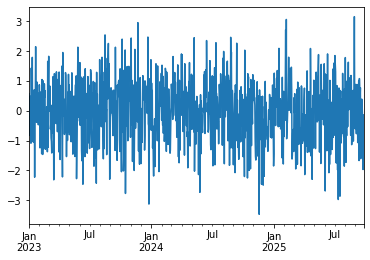

In [82]:
s.plot()

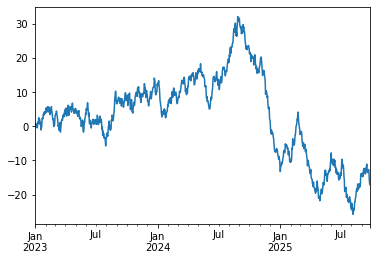

In [83]:
s = s.cumsum()
s.plot()

In [86]:
df = DataFrame(np.random.randn(1000, 4), index=s.index,columns=list('ABCD'))
df = df.cumsum()
df

A         B          C          D
2023-01-01 -0.131069 -1.438293  -0.101090  -1.007853
2023-01-02  0.106278 -3.218580   1.939031  -0.883302
2023-01-03  0.050158 -2.998299   2.956335   0.200783
2023-01-04 -1.079065 -3.289979   3.476225  -0.172064
2023-01-05 -1.855129 -1.337562   3.492536   1.320802
...              ...       ...        ...        ...
2025-09-22  7.121682 -7.755947 -19.733350  38.517196
2025-09-23  7.102471 -7.468640 -20.165336  39.211996
2025-09-24  6.587122 -6.335289 -19.732800  38.524455
2025-09-25  5.981917 -7.911551 -18.570164  38.031784
2025-09-26  5.833043 -9.335912 -18.962144  37.550915

[1000 rows x 4 columns]

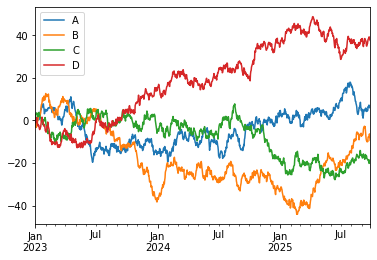

In [87]:
df.plot()

In [88]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=["B", "C"]).cumsum()
df

B          C
0     0.077156   0.946247
1     0.372599   1.792765
2     0.626965   0.896099
3     1.399830   2.571736
4     1.405802   3.305375
..         ...        ...
995  54.257841 -37.599152
996  55.565662 -38.317972
997  55.149126 -38.168694
998  52.531972 -37.482275
999  52.178500 -37.704163

[1000 rows x 2 columns]

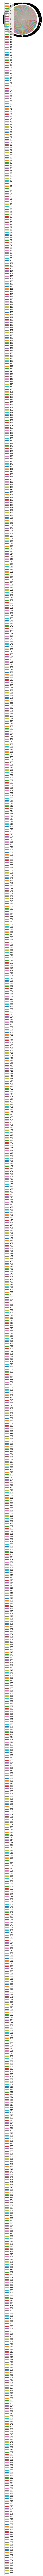

In [95]:
df.plot(kind='pie', y="A")

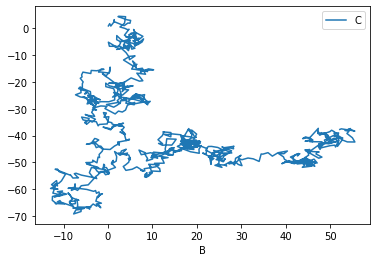

In [92]:
df.plot(x='B',y='C')

In [93]:
df["A"] = pd.Series(list(df.index))
df

B          C    A
0     0.077156   0.946247    0
1     0.372599   1.792765    1
2     0.626965   0.896099    2
3     1.399830   2.571736    3
4     1.405802   3.305375    4
..         ...        ...  ...
995  54.257841 -37.599152  995
996  55.565662 -38.317972  996
997  55.149126 -38.168694  997
998  52.531972 -37.482275  998
999  52.178500 -37.704163  999

[1000 rows x 3 columns]

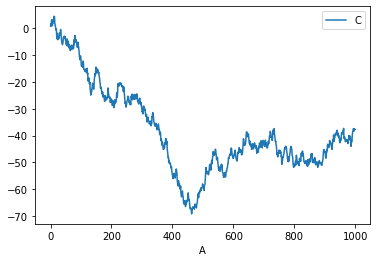

In [94]:
df.plot(x='A',y='C')